# **Twitter Sentiment Analysis**

To provide a comprehensive analysis and inference of the sentiment analysis model (SVM in this case) and the data, we will go through each step of the process, discuss the choices made, and analyze the results. This includes data preparation, exploratory data analysis, feature extraction, model training, and evaluation.



## Data Preparation

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter



# Load the dataset
file_path = '/Tweets.csv'  # Google drive path
tweets_df = pd.read_csv(file_path)

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

This module contains functions for preprocessing text data.

The functions provided in this module include:

* preprocess_text: This function takes a text string as input and returns a preprocessed version of the text. The preprocessing steps include lowercasing, removing special characters, and removing stop words.
* get_removed_special_chars_counter: This function returns a Counter object that contains the counts of the special characters that were removed during the preprocessing process.
* get_removed_stop_words_counter: This function returns a Counter object that contains the counts of the stop words that were removed during the preprocessing process.



In [ ]:
# Initialize counters
removed_special_chars_counter = Counter()
removed_stop_words_counter = Counter()

def preprocess_text(text):
    original_text = text

    # Lowercasing
    text = text.lower()

    # Remove special characters and count them
    special_chars = re.findall(r'\W', text)
    removed_special_chars_counter.update(special_chars)
    text = re.sub(r'\W', ' ', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords and count them
    stop_words = set(stopwords.words('english'))
    removed_stop_words = [word for word in tokens if word in stop_words]
    removed_stop_words_counter.update(removed_stop_words)
    tokens = [word for word in tokens if word not in stop_words]

    # Re-create string from tokens
    text = ' '.join(tokens)

    return text

# Apply the preprocessing function
tweets_df['processed_text'] = tweets_df['text'].apply(preprocess_text)

# Print removed elements and their counts
print("Removed Special Characters:")
print(removed_special_chars_counter)
print("\nRemoved Stop Words:")
print(removed_stop_words_counter)


Removed Special Characters:
Counter({' ': 245886, '.': 19104, '@': 16583, "'": 5671, '!': 5312, '?': 4678, '/': 4427, ',': 4199, '#': 3651, ':': 2350, '-': 1935, ';': 956, '"': 925, '&': 823, ')': 674, '(': 520, '$': 432, '\n': 205, '”': 202, '+': 197, '“': 193, '’': 147, '️': 126, '🙏': 125, '😂': 62, '✈': 57, '^': 57, '=': 53, '😭': 44, '…': 43, '*': 43, '👍': 42, '😡': 33, '😢': 32, '❤': 31, '😊': 31, '%': 29, '👏': 28, '😉': 20, '✌': 19, '😩': 18, '😁': 18, '~': 18, '😒': 17, '😃': 16, '👎': 16, '👌': 14, '🆘': 14, '💙': 13, '😄': 12, '—': 11, '😔': 11, '☺': 10, '😍': 10, '|': 10, '💔': 10, '😕': 9, '❄': 8, '{': 8, '}': 8, '💗': 8, '🎉': 8, '😤': 8, '🙌': 7, '😞': 7, '😜': 7, '😑': 7, '💕': 6, '😎': 6, '😀': 6, '🎀': 6, '🌴': 6, '👠': 6, '⭐': 6, '°': 6, '🇺': 5, '🇸': 5, '🇬': 5, '🇧': 5, '😥': 5, '💩': 5, '[': 5, ']': 5, '😏': 5, '😳': 5, '😐': 5, '👀': 5, '💺': 4, '😘': 4, '♥': 4, '🙅': 4, '😫': 4, '😖': 4, '💝': 4, '͡': 4, '☀': 4, '💯': 4, '😠': 4, '🚶': 4, '🍅': 4, '🌞': 3, '😱': 3, '€': 3, '😻': 3, '💁': 3, '😆': 3, '🔵': 3, '💜': 2, '🍷'

### Applying the preprocessing function


In [ ]:
# Applying the preprocessing function
tweets_df['processed_text'] = tweets_df['text'].apply(preprocess_text)


In [ ]:
tweets_df[['text', 'processed_text']].head()


,text,processed_text
0,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...
2,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...
3,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing


**Choice of Techniques:**
- **Text Lowercasing**: This is standard in text processing to avoid the same words in different cases being treated as different words.
- **Removing Special Characters**: Helps in reducing the complexity of the analysis and focuses on the actual words.
- **Tokenization**: Breaks text into individual words, which is essential for text analysis.
- **Removing Stop Words**: Stop words (like "the", "is", etc.) are removed as they do not contribute significantly to sentiment.

**Inference from Data Preparation:**
- The quality of data after preprocessing directly impacts model performance. Cleaner, more relevant text data should lead to better model training.

## Exploratory Data Analysis



**Choice of Techniques:**
- **Sentiment Distribution Analysis**: Understanding the balance or imbalance in sentiment classes.
- **Word Clouds**: Visually identify the most frequent words in each sentiment category.



The following steps are taken:

1. The necessary packages are imported.
2. The data is loaded.
3. The data is preprocessed by lowercasing, removing special characters, and removing stop words.
4. The distribution of sentiment labels is visualized using a bar chart.
5. Word clouds are created for each sentiment class.

EDA is an important step in data analysis as it helps to understand the data and identify patterns and trends. This information can then be used to make informed decisions about the data.

**Observations from EDA:**
- Imbalanced classes could lead to a biased model towards the majority class.
- Frequent words in each sentiment category give insights into the nature of sentiments expressed.
The bellow code performs exploratory data analysis (EDA) on a dataset.

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Define a color palette

palette = sns.color_palette("icefire")  # Example palette, feel free to choose your own

# Apply the palette to seaborn
sns.set_palette(palette)





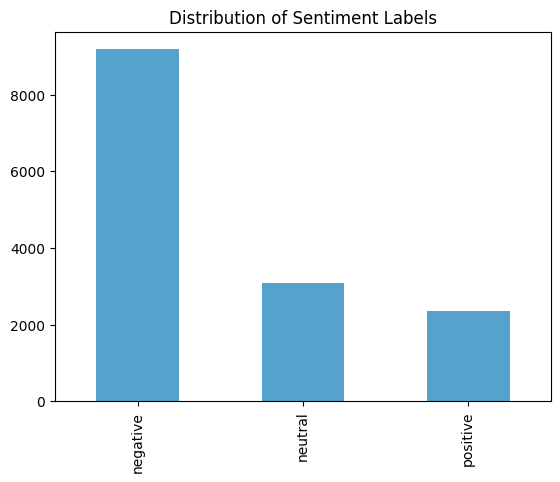

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
# Distribution of sentiment labels
sentiment_counts = tweets_df['airline_sentiment'].value_counts()
tweets_df['airline_sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment Labels')
plt.show()
sentiment_counts

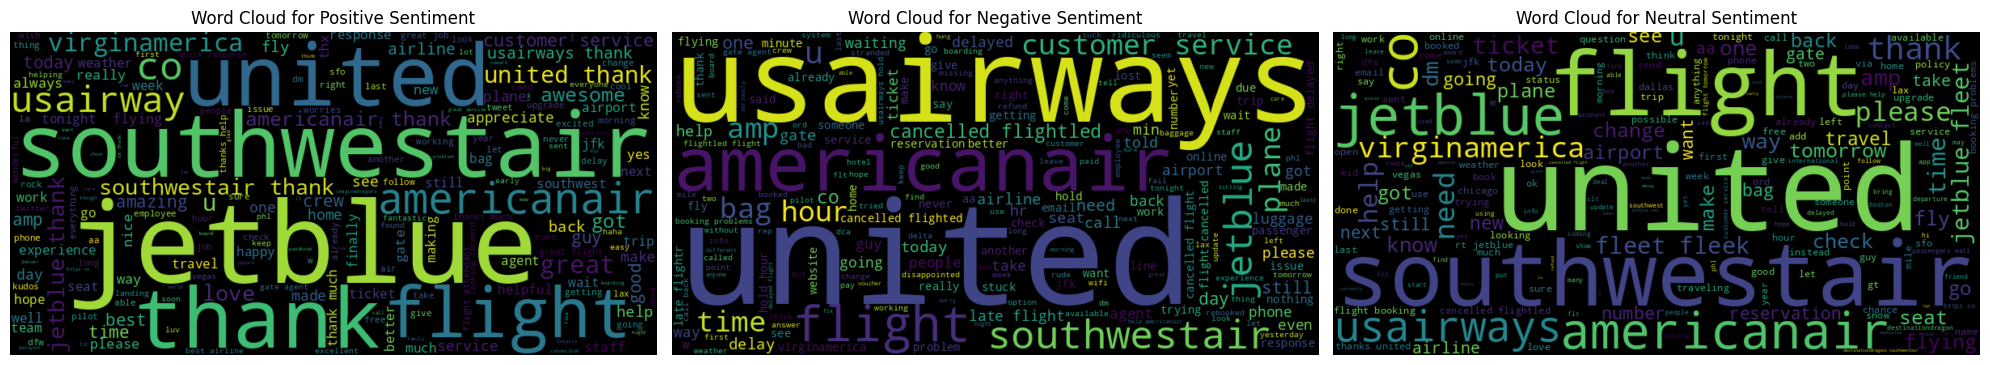

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sentiments to be analyzed
sentiments = ['positive', 'negative', 'neutral']

# Set up the figure with multiple subplots
plt.figure(figsize=(20, 10))

# Loop through each sentiment
for i, sentiment in enumerate(sentiments, 1):
    text = ' '.join(tweets_df[tweets_df['airline_sentiment'] == sentiment]['processed_text'])
    wordcloud = WordCloud(width=800, height=400).generate(text)

    # Add a subplot for each sentiment
    plt.subplot(1, 3, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.axis('off')

# Display the word clouds side by side
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

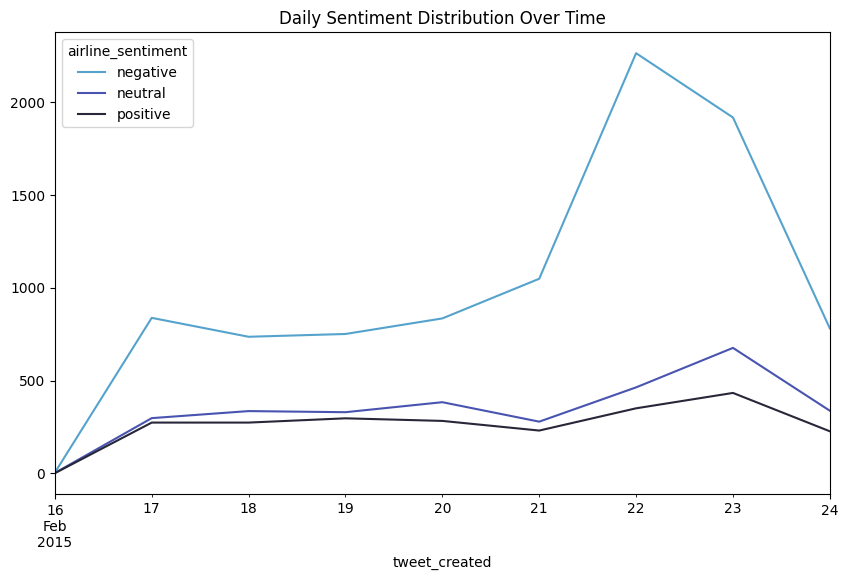

In [ ]:
# Convert 'tweet_created' to datetime
tweets_df['tweet_created'] = pd.to_datetime(tweets_df['tweet_created'])

# Resample to a daily frequency, counting the number of sentiments each day
daily_sentiments = tweets_df.resample('D', on='tweet_created')['airline_sentiment'].value_counts().unstack().fillna(0)

# Plotting the daily sentiment distribution
daily_sentiments.plot(kind='line', figsize=(10, 6))
plt.title('Daily Sentiment Distribution Over Time')
plt.ylabel


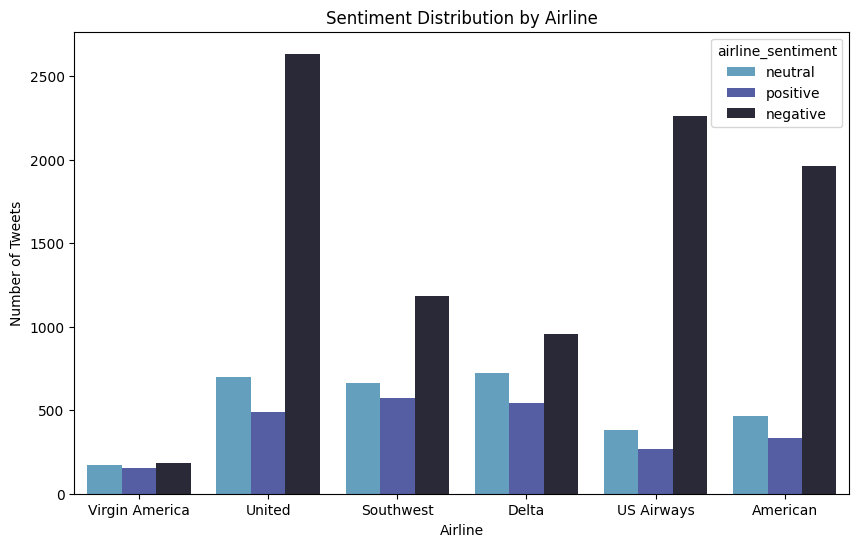

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=tweets_df)
plt.title('Sentiment Distribution by Airline')
plt.ylabel('Number of Tweets')
plt.xlabel('Airline')
plt.show()


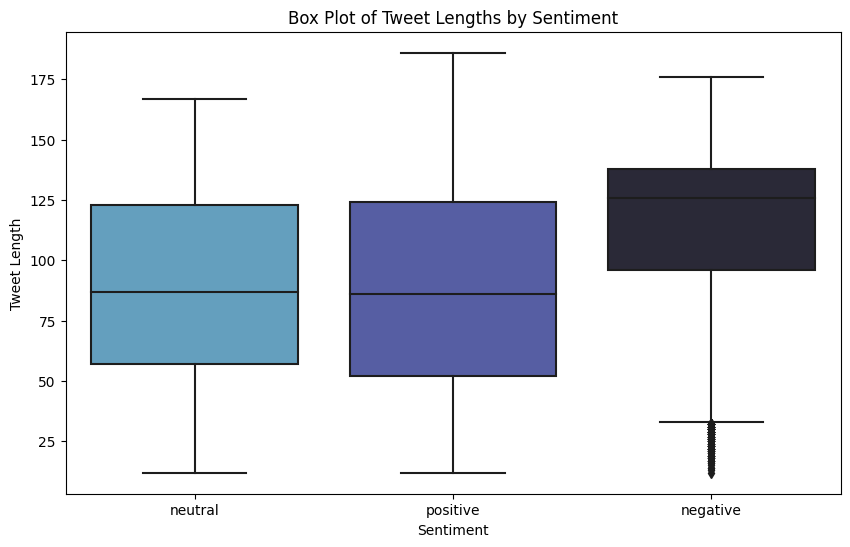

In [ ]:
# Calculate tweet length
tweets_df['tweet_length'] = tweets_df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.boxplot(x='airline_sentiment', y='tweet_length', data=tweets_df)
plt.title('Box Plot of Tweet Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()


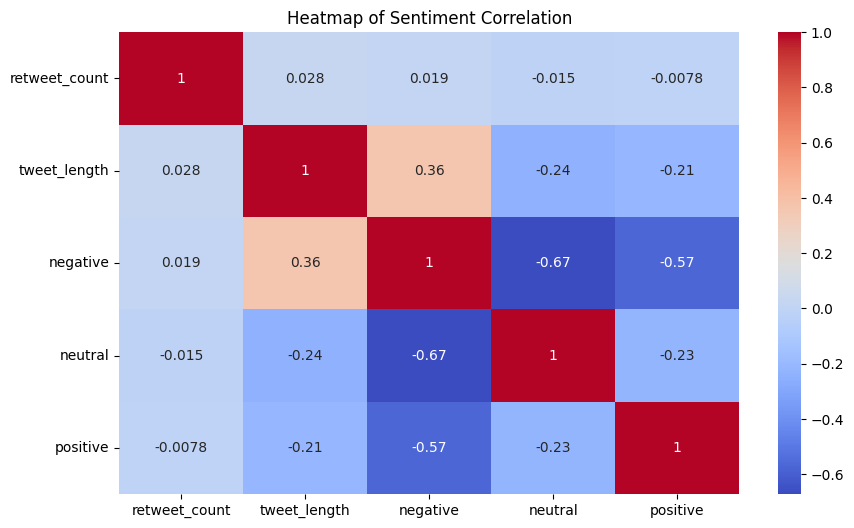

In [ ]:
# Correlation matrix
corr = tweets_df[['retweet_count', 'tweet_length']].join(pd.get_dummies(tweets_df['airline_sentiment'])).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Sentiment Correlation')
plt.show()


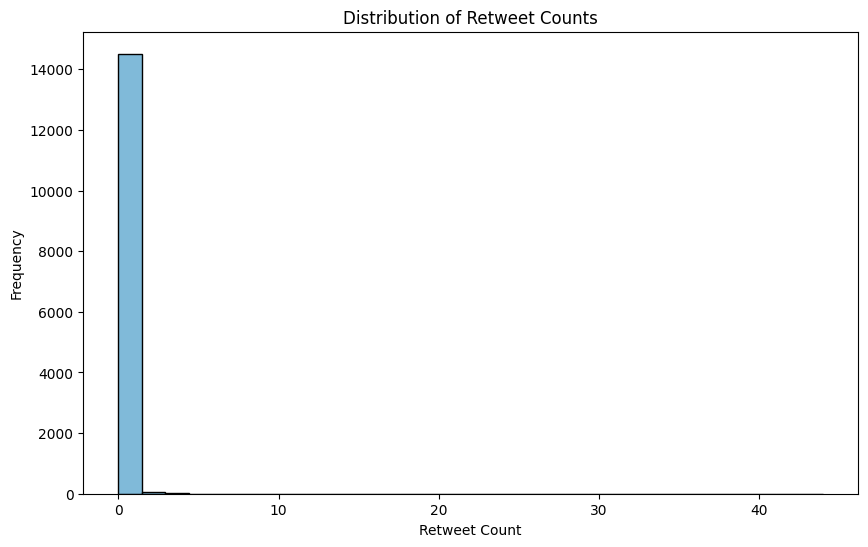

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(tweets_df['retweet_count'], bins=30, kde=False)
plt.title('Distribution of Retweet Counts')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.show()


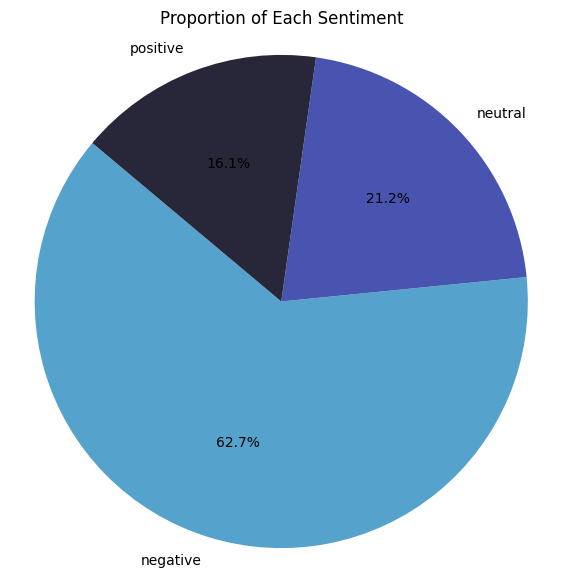

In [ ]:
# Count the number of occurrences of each sentiment
sentiment_counts = tweets_df['airline_sentiment'].value_counts()

# Create a pie chart with the specified colors
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=palette, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Each Sentiment')
plt.show()

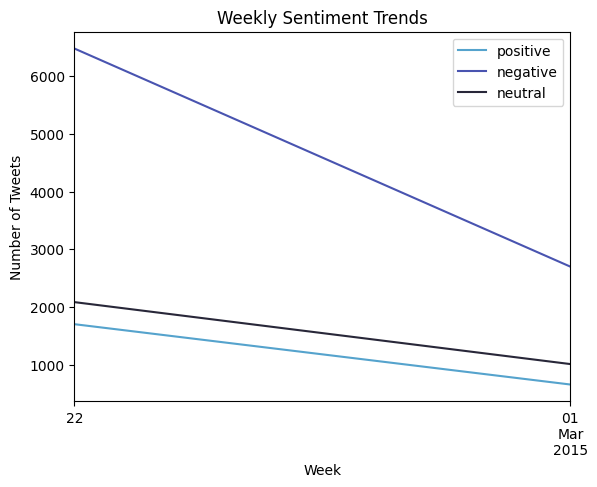

In [ ]:
# Assuming 'tweet_created' is already converted to datetime
tweets_df.set_index('tweet_created', inplace=True)
tweets_df['positive'] = (tweets_df['airline_sentiment'] == 'positive').astype(int)
tweets_df['negative'] = (tweets_df['airline_sentiment'] == 'negative').astype(int)
tweets_df['neutral'] = (tweets_df['airline_sentiment'] == 'neutral').astype(int)

tweets_df[['positive', 'negative', 'neutral']].resample('W').sum().plot()
plt.title('Weekly Sentiment Trends')
plt.ylabel('Number of Tweets')
plt.xlabel('Week')
plt.show()


## Feature Extraction & Split


### Feature Extraction

**Choice of Technique: TF-IDF**
- TF-IDF (Term Frequency-Inverse Document Frequency) is chosen for its ability to reflect the importance of a word to a document in a collection. This is crucial for text classification.

**Inference from Feature Extraction:**
- TF-IDF provides a numerical way to represent text data, which is necessary for machine learning models.
- The choice of the number of features (e.g., 5000) can impact performance and computational efficiency.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(tweets_df['processed_text']).toarray()

# Labels
y = tweets_df['airline_sentiment']



### Splitting the dataset

In [ ]:

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Training & Tuning - SVM

**Choice of Algorithm: SVM**
- SVM is effective in high-dimensional spaces (like text data) and is versatile with its kernel tricks.
- It's well-suited for binary classification tasks, like sentiment analysis.


### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Training a Support Vector Machine model
svm_model = SVC(kernel='linear',gamma='auto')
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)



**Inference from Model Training:**
- The linear kernel was chosen for its simplicity and effectiveness for text classification.
- SVM's performance can vary significantly with different kernels and hyperparameters.

## Model Evaluation


### Model Evaluation

**Metrics: Accuracy, Precision, Recall, F1 Score**
- These metrics provide a comprehensive view of the model's performance.
- Precision and recall are particularly important in imbalanced datasets.

**Observations from Model Evaluation:**
- High accuracy doesn't always imply a good model, especially in imbalanced datasets.
- F1 score is a better measure when dealing with imbalanced datasets as it balances precision and recall.

### Overall Analysis and Justification

- The SVM algorithm, combined with TF-IDF features, is a strong baseline for text classification tasks like sentiment analysis.
- The choice of preprocessing steps and TF-IDF reflects a focus on creating meaningful, context-rich features from text data.
- The evaluation metrics provide a rounded understanding of model performance, addressing potential imbalances in the dataset.

**Further Improvements:**
- Experimenting with different machine learning algorithms and hyperparameters.
- Exploring advanced text representations like word embeddings.
- Considering deep learning approaches like LSTM for potentially better performance on large and complex datasets.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

# Print the performance metrics
print("SVM Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))



SVM Model Performance:
Accuracy: 0.7935
Precision: 0.7849
Recall: 0.7935
F1 Score: 0.7848

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.92      0.87      2814
     neutral       0.63      0.50      0.56       884
    positive       0.81      0.65      0.72       694

    accuracy                           0.79      4392
   macro avg       0.76      0.69      0.72      4392
weighted avg       0.78      0.79      0.78      4392



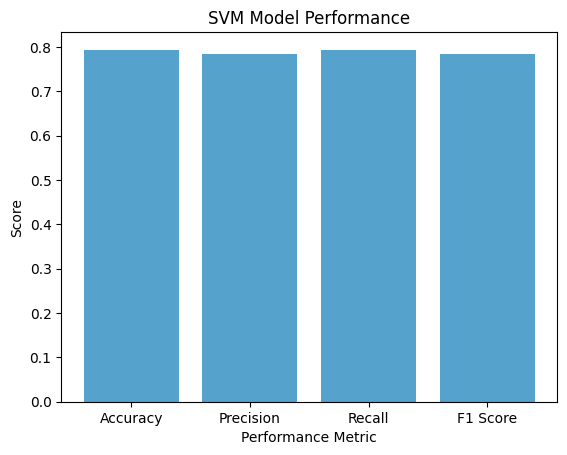

In [ ]:
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy, precision, recall, f1])
plt.xlabel('Performance Metric')
plt.ylabel('Score')
plt.title('SVM Model Performance')
plt.show()